<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/hey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('/content/drive/My Drive/train.csv',error_bad_lines=False)
data1 = pd.read_csv('/content/drive/My Drive/test.csv',error_bad_lines=False)
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [0]:
data.drop(['PdDistrict','Resolution','Address','X','Y'], inplace=True, axis=1)


In [5]:
data.head()

,Dates,Category,Descript,DayOfWeek
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday


In [6]:
data['Dates'] = pd.to_datetime(data['Dates'].astype(str), errors='coerce')
data['Dates'] = pd.to_datetime(data['Dates'], format = '%d/%m/%Y %H:%M:%S')
data.head()

,Dates,Category,Descript,DayOfWeek
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday


In [7]:
data.shape

(878049, 4)

In [9]:
data.index = pd.DatetimeIndex(data.Dates)
data.head()


,Dates,Category,Descript,DayOfWeek
Dates,,,,
2015-05-13 23:53:00,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday
2015-05-13 23:53:00,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday
2015-05-13 23:33:00,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday
2015-05-13 23:30:00,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday
2015-05-13 23:30:00,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday


In [10]:
data['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [0]:
Groups = data.groupby(data['Category'])
Groups = dict(list(Groups))
theft_data = [Groups['LARCENY/THEFT']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del data

In [13]:
theft_data.shape

(174900, 4)

In [14]:
theft_prophet = theft_data.resample('M').size().reset_index()
theft_prophet.columns = ['Dates', 'Crime Count']
theft_prophet.head()


,Dates,Crime Count
0,2003-01-31,962
1,2003-02-28,1038
2,2003-03-31,1125
3,2003-04-30,1226
4,2003-05-31,1191


In [15]:
theft_prophet.tail()

,Dates,Crime Count
144,2015-01-31,1577
145,2015-02-28,1722
146,2015-03-31,1855
147,2015-04-30,1738
148,2015-05-31,619


In [16]:
theft_prophet_df = pd.DataFrame(theft_prophet)
theft_prophet_df.columns


Index(['Dates', 'Crime Count'], dtype='object')

In [17]:
theft_prophet_data = theft_prophet_df.rename(columns={'Dates':'ds', 'Crime Count':'y'})
theft_prophet_data.head()


,ds,y
0,2003-01-31,962
1,2003-02-28,1038
2,2003-03-31,1125
3,2003-04-30,1226
4,2003-05-31,1191


In [0]:
from fbprophet import Prophet
m = Prophet()

In [19]:
m.add_seasonality(name="weekly",period=7,fourier_order=5)

In [20]:
m.fit(theft_prophet_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=2190)
future

,ds
0,2003-01-31
1,2003-02-28
2,2003-03-31
3,2003-04-30
4,2003-05-31
...,...
2334,2021-05-25
2335,2021-05-26
2336,2021-05-27
2337,2021-05-28


In [0]:
forecast = m.predict(future)

In [32]:
forecast[['ds','trend','yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,trend,yhat,yhat_lower,yhat_upper
2334,2021-05-25,2405.689943,1107.205447,912.297951,1330.026109
2335,2021-05-26,2406.038962,1261.650238,1053.712441,1485.625786
2336,2021-05-27,2406.387981,1461.605471,1257.822533,1672.230988
2337,2021-05-28,2406.736999,1685.530293,1472.313467,1900.750800
2338,2021-05-29,2407.086018,1945.913910,1746.425156,2153.871280


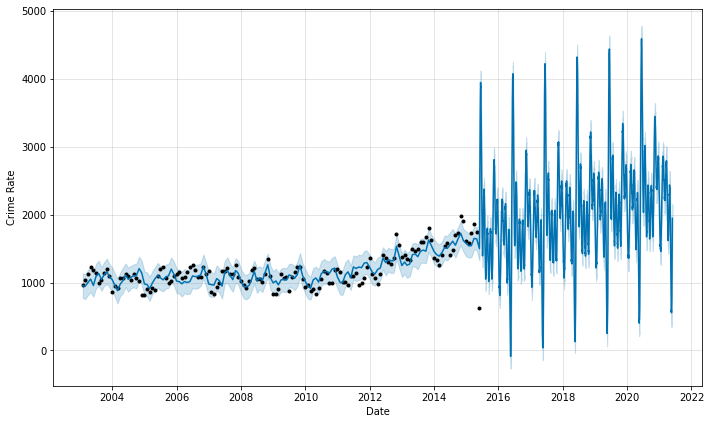

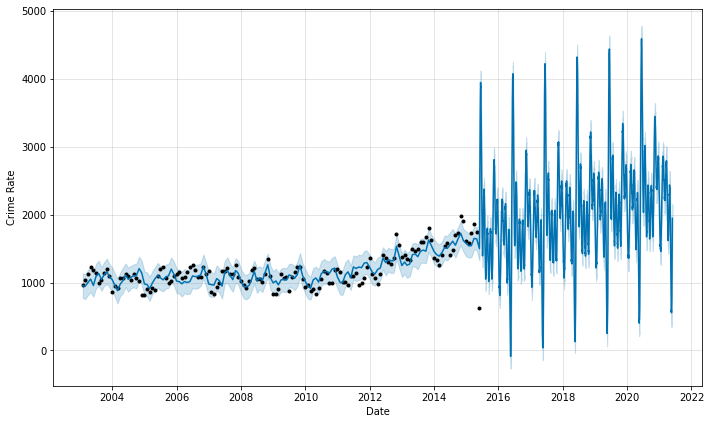

In [33]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

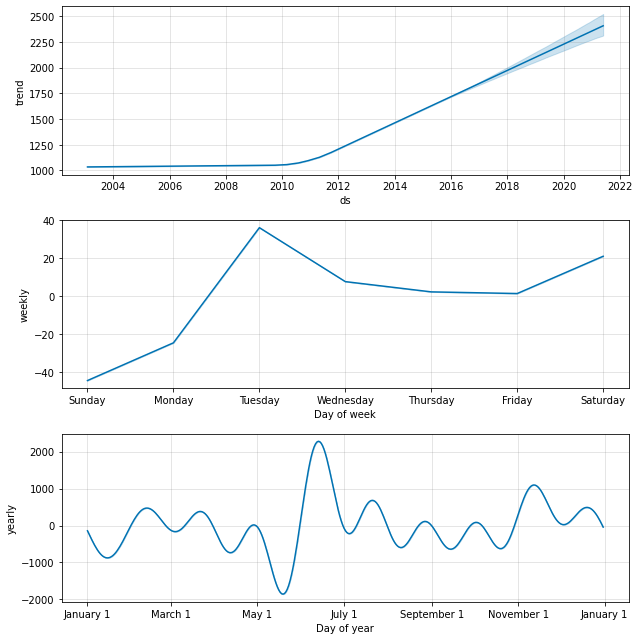

In [34]:
fig=m.plot_components(forecast)

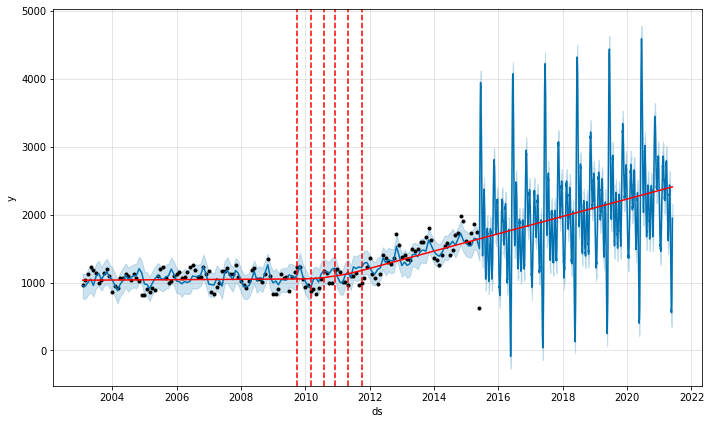

In [35]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
c = add_changepoints_to_plot(fig.gca(),m,forecast)


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [37]:
metric_df = forecast.set_index('ds')[['yhat']].join(theft_prophet_data.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
metric_df.head()

,ds,yhat,y
0,2003-01-31,951.584386,962.0
1,2003-02-28,946.591863,1038.0
2,2003-03-31,1001.276230,1125.0
3,2003-04-30,1050.000558,1226.0
4,2003-05-31,955.761428,1191.0


In [38]:
r2_score(metric_df.y, metric_df.yhat)

0.6914513568857121

In [39]:
mean_squared_error(metric_df.y, metric_df.yhat)

19209.123320069415

In [40]:
mean_absolute_error(metric_df.y, metric_df.yhat)

100.39021373036228

In [41]:
from fbprophet.diagnostics import cross_validation
forecast = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
forecast.head()


INFO:fbprophet:Making 19 forecasts with cutoffs between 2005-07-17 00:00:00 and 2014-05-31 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-31,803.691627,771.463809,836.463460,1234,2005-07-17
1,2005-08-31,1464.461357,1431.564071,1496.734915,1060,2005-07-17
2,2005-09-30,603.607015,571.929152,637.155872,987,2005-07-17
3,2005-10-31,985.236685,952.166537,1018.198257,1029,2005-07-17
4,2005-11-30,1284.729168,1252.645678,1318.374626,1098,2005-07-17


In [42]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(forecast)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,39 days,45951.382046,214.362735,177.431487,0.159697,0.130016,0.363636
1,40 days,44440.012141,210.807998,172.101748,0.151987,0.125859,0.409091
2,44 days,42356.695702,205.807424,168.605073,0.144786,0.125859,0.409091
3,45 days,49502.258933,222.491031,183.659576,0.158792,0.130016,0.363636
4,46 days,47317.120218,217.524988,176.504247,0.153140,0.125859,0.363636
